In [1]:
import sys
import os

PROJECT_ROOT = os.path.abspath(os.path.join(os.path.dirname(""), "../../"))
sys.path.insert(0, PROJECT_ROOT)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from setlistfm import setlist_dataframe

import logging


logging.basicConfig(level=logging.INFO)  # DEBUG < INFO < WARNING < ERROR < CRITICAL

pd.set_option("display.max_columns", None)  # Show all columns

In [29]:
# # Fetch and save 3 pages for testing
mbid = "759b5ff1-91fe-4ec9-b9b7-75b7b2ceb283"
setlist = setlist_dataframe("759b5ff1-91fe-4ec9-b9b7-75b7b2ceb283", sample=False, name_hint="mewithoutYou")

INFO:setlistfm.utils:Using cached: get_all_setlists_mewithoutyou_759b5ff1-91fe-4ec9-b9b7-75b7b2ceb283_full.json


In [30]:
setlist.head(5)

,event_date,event_id,event_info,event_url,venue,venue_city,venue_state_code,venue_lat,venue_lon,venue_country_code,set_index,encore_flag,encore_index,song_index,song,song_info,song_cover_flag,song_cover_artist_name,song_cover_artist_mbid,song_with_flag,song_with_artist_name,song_with_artist_mbid
0,20-08-2022,6bb33af6,"""The End of the End: The Final 'Farewell' - Ni...",https://www.setlist.fm/setlist/mewithoutyou/20...,The Fillmore Philadelphia,Philadelphia,PA,39.952335,-75.163789,US,0,False,0,1,Pale Horse,None,False,None,None,False,None,None
1,20-08-2022,6bb33af6,"""The End of the End: The Final 'Farewell' - Ni...",https://www.setlist.fm/setlist/mewithoutyou/20...,The Fillmore Philadelphia,Philadelphia,PA,39.952335,-75.163789,US,0,False,0,2,Bullet to Binary,None,False,None,None,False,None,None
2,20-08-2022,6bb33af6,"""The End of the End: The Final 'Farewell' - Ni...",https://www.setlist.fm/setlist/mewithoutyou/20...,The Fillmore Philadelphia,Philadelphia,PA,39.952335,-75.163789,US,0,False,0,3,Nice and Blue,None,False,None,None,False,None,None
3,20-08-2022,6bb33af6,"""The End of the End: The Final 'Farewell' - Ni...",https://www.setlist.fm/setlist/mewithoutyou/20...,The Fillmore Philadelphia,Philadelphia,PA,39.952335,-75.163789,US,0,False,0,4,Paper Hanger,None,False,None,None,False,None,None
4,20-08-2022,6bb33af6,"""The End of the End: The Final 'Farewell' - Ni...",https://www.setlist.fm/setlist/mewithoutyou/20...,The Fillmore Philadelphia,Philadelphia,PA,39.952335,-75.163789,US,0,False,0,5,East Enders Wives,None,False,None,None,False,None,None


In [6]:
len(setlist)

11072

In [7]:
setlist.event_id.nunique()

905

In [8]:
setlist.event_date.min()

'01-01-2000'

In [31]:
setlist['event_date'] = pd.to_datetime(setlist['event_date'], errors='coerce')

setlist['year'] = setlist['event_date'].dt.year

event_counts = setlist.groupby('year')['event_url'].nunique()

event_counts

/var/folders/jx/c2qzc0q55l5f5np5j5nzwtxh0000gn/T/ipykernel_96494/1719598102.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  setlist['event_date'] = pd.to_datetime(setlist['event_date'], errors='coerce')


year
2000     1
2001     3
2002     6
2003    11
2004    12
2005    17
2006    33
2007    54
2008    27
2009    43
2010    41
2011    28
2012    64
2013    43
2014    59
2015    88
2016    98
2017    88
2018    49
2019    44
2020    28
2021    12
2022    56
Name: event_url, dtype: int64

<Axes: title={'center': 'Unique Events per Year'}, xlabel='year'>

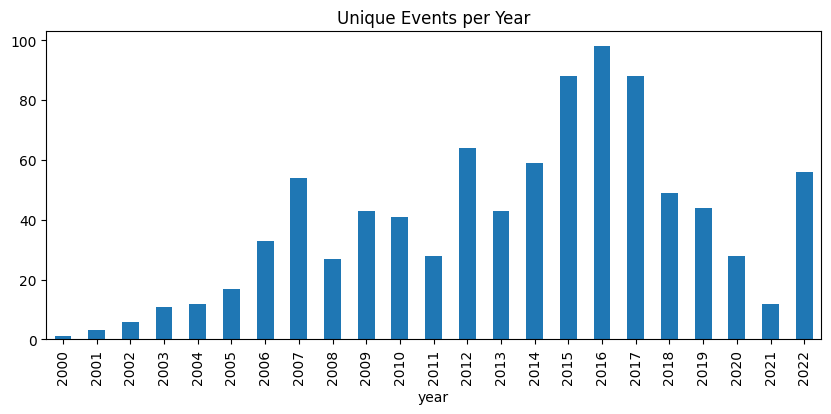

In [11]:
event_counts.plot(kind='bar', title='Unique Events per Year', figsize=(10, 4))

In [12]:
setlist.head(20)

,event_date,event_id,event_info,event_url,venue,venue_city,venue_state_code,venue_lat,venue_lon,venue_country_code,set_index,encore_flag,encore_index,song_index,song,song_info,song_cover_flag,song_cover_artist_name,song_cover_artist_mbid,song_with_flag,song_with_artist_name,song_with_artist_mbid,year
0,2022-08-20,6bb33af6,"""The End of the End: The Final 'Farewell' - Ni...",https://www.setlist.fm/setlist/mewithoutyou/20...,The Fillmore Philadelphia,Philadelphia,PA,39.952335,-75.163789,US,0,False,0,1,Pale Horse,None,False,None,None,False,None,None,2022
1,2022-08-20,6bb33af6,"""The End of the End: The Final 'Farewell' - Ni...",https://www.setlist.fm/setlist/mewithoutyou/20...,The Fillmore Philadelphia,Philadelphia,PA,39.952335,-75.163789,US,0,False,0,2,Bullet to Binary,None,False,None,None,False,None,None,2022
2,2022-08-20,6bb33af6,"""The End of the End: The Final 'Farewell' - Ni...",https://www.setlist.fm/setlist/mewithoutyou/20...,The Fillmore Philadelphia,Philadelphia,PA,39.952335,-75.163789,US,0,False,0,3,Nice and Blue,None,False,None,None,False,None,None,2022
3,2022-08-20,6bb33af6,"""The End of the End: The Final 'Farewell' - Ni...",https://www.setlist.fm/setlist/mewithoutyou/20...,The Fillmore Philadelphia,Philadelphia,PA,39.952335,-75.163789,US,0,False,0,4,Paper Hanger,None,False,None,None,False,None,None,2022
4,2022-08-20,6bb33af6,"""The End of the End: The Final 'Farewell' - Ni...",https://www.setlist.fm/setlist/mewithoutyou/20...,The Fillmore Philadelphia,Philadelphia,PA,39.952335,-75.163789,US,0,False,0,5,East Enders Wives,None,False,None,None,False,None,None,2022
5,2022-08-20,6bb33af6,"""The End of the End: The Final 'Farewell' - Ni...",https://www.setlist.fm/setlist/mewithoutyou/20...,The Fillmore Philadelphia,Philadelphia,PA,39.952335,-75.163789,US,0,False,0,6,Fox's Dream of the Log Flume,None,False,None,None,False,None,None,2022
6,2022-08-20,6bb33af6,"""The End of the End: The Final 'Farewell' - Ni...",https://www.setlist.fm/setlist/mewithoutyou/20...,The Fillmore Philadelphia,Philadelphia,PA,39.952335,-75.163789,US,0,False,0,7,Red Cow,None,False,None,None,False,None,None,2022
7,2022-08-20,6bb33af6,"""The End of the End: The Final 'Farewell' - Ni...",https://www.setlist.fm/setlist/mewithoutyou/20...,The Fillmore Philadelphia,Philadelphia,PA,39.952335,-75.163789,US,0,False,0,8,Dorothy,None,False,None,None,False,None,None,2022
8,2022-08-20,6bb33af6,"""The End of the End: The Final 'Farewell' - Ni...",https://www.setlist.fm/setlist/mewithoutyou/20...,The Fillmore Philadelphia,Philadelphia,PA,39.952335,-75.163789,US,0,False,0,9,Wolf Am I! (And Shadow),None,False,None,None,False,None,None,2022
9,2022-08-20,6bb33af6,"""The End of the End: The Final 'Farewell' - Ni...",https://www.setlist.fm/setlist/mewithoutyou/20...,The Fillmore Philadelphia,Philadelphia,PA,39.952335,-75.163789,US,0,False,0,10,Elephant in the Dock,None,False,None,None,False,None,None,2022


In [14]:
setlist['song'].value_counts()

song
In a Sweater Poorly Knit    462
January 1979                348
Red Cow                     325
Messes of Men               325
Torches Together            307
                           ... 
Buddy Holly                   1
El Scorcho                    1
My Name Is Jonas              1
No One Else                   1
Working in a Factory          1
Name: count, Length: 148, dtype: int64

In [18]:
df_recent = setlist[setlist.event_date >= '2019-01-01'].reset_index(drop=True)

df_recent

,event_date,event_id,event_info,event_url,venue,venue_city,venue_state_code,venue_lat,venue_lon,venue_country_code,set_index,encore_flag,encore_index,song_index,song,song_info,song_cover_flag,song_cover_artist_name,song_cover_artist_mbid,song_with_flag,song_with_artist_name,song_with_artist_mbid,year
0,2022-08-20,6bb33af6,"""The End of the End: The Final 'Farewell' - Ni...",https://www.setlist.fm/setlist/mewithoutyou/20...,The Fillmore Philadelphia,Philadelphia,PA,39.952335,-75.163789,US,0,False,0,1,Pale Horse,None,False,None,None,False,None,None,2022
1,2022-08-20,6bb33af6,"""The End of the End: The Final 'Farewell' - Ni...",https://www.setlist.fm/setlist/mewithoutyou/20...,The Fillmore Philadelphia,Philadelphia,PA,39.952335,-75.163789,US,0,False,0,2,Bullet to Binary,None,False,None,None,False,None,None,2022
2,2022-08-20,6bb33af6,"""The End of the End: The Final 'Farewell' - Ni...",https://www.setlist.fm/setlist/mewithoutyou/20...,The Fillmore Philadelphia,Philadelphia,PA,39.952335,-75.163789,US,0,False,0,3,Nice and Blue,None,False,None,None,False,None,None,2022
3,2022-08-20,6bb33af6,"""The End of the End: The Final 'Farewell' - Ni...",https://www.setlist.fm/setlist/mewithoutyou/20...,The Fillmore Philadelphia,Philadelphia,PA,39.952335,-75.163789,US,0,False,0,4,Paper Hanger,None,False,None,None,False,None,None,2022
4,2022-08-20,6bb33af6,"""The End of the End: The Final 'Farewell' - Ni...",https://www.setlist.fm/setlist/mewithoutyou/20...,The Fillmore Philadelphia,Philadelphia,PA,39.952335,-75.163789,US,0,False,0,5,East Enders Wives,None,False,None,None,False,None,None,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,2019-03-18,339274dd,None,https://www.setlist.fm/setlist/mewithoutyou/20...,123 Pleasant Street,Morgantown,WV,39.629526,-79.955897,US,0,False,0,12,"Flee, Thou Matadors!",None,False,None,None,False,None,None,2019
2456,2019-03-18,339274dd,None,https://www.setlist.fm/setlist/mewithoutyou/20...,123 Pleasant Street,Morgantown,WV,39.629526,-79.955897,US,0,False,0,13,Rainbow Signs,None,False,None,None,False,None,None,2019
2457,2019-03-18,339274dd,None,https://www.setlist.fm/setlist/mewithoutyou/20...,123 Pleasant Street,Morgantown,WV,39.629526,-79.955897,US,0,False,0,14,"Bethlehem, WV",None,False,None,None,False,None,None,2019
2458,2019-03-18,339274dd,None,https://www.setlist.fm/setlist/mewithoutyou/20...,123 Pleasant Street,Morgantown,WV,39.629526,-79.955897,US,1,True,1,0,Torches Together,None,False,None,None,False,None,None,2019


In [20]:
df_recent['covid_era'] = df_recent['event_date'].apply(
    lambda d: 'pre' if d < pd.Timestamp('2020-03-01') else 'post'
)

song_counts = (
    df_recent
    .groupby(['covid_era', 'song'])
    .size()
    .reset_index(name='count')
)

# Normalize by total shows per era (since they likely did fewer shows post-2020)
total_shows = df_recent.groupby('covid_era')['event_date'].nunique().to_dict()

song_counts['per_show'] = song_counts.apply(
    lambda row: row['count'] / total_shows[row['covid_era']], axis=1
)

In [21]:
# Pivot table to see differences
pivot = song_counts.pivot(index='song', columns='covid_era', values='per_show').fillna(0)

# Add a column for difference
pivot['change'] = pivot['post'] - pivot['pre']

# See most increased/decreased songs
pivot.sort_values('change', ascending=False).head(10)  # Most more-played post-COVID
pivot.sort_values('change').head(10)                   # Most dropped post-COVID

covid_era,post,pre,change
song,,,
"Flee, Thou Matadors!",0.117647,0.416667,-0.299020
Tortoises All the Way Down,0.161765,0.416667,-0.254902
"New Wine, New Skins",0.205882,0.444444,-0.238562
Another Head for Hydra,0.264706,0.500000,-0.235294
Watermelon Ascot,0.132353,0.277778,-0.145425
"9:27a.m., 7/29",0.411765,0.555556,-0.143791
"Julia (or, 'Holy to the LORD' on the Bells of Horses)",0.867647,0.972222,-0.104575
Grist for the Malady Mill,0.205882,0.291667,-0.085784
Red Cow,0.441176,0.513889,-0.072712


<Axes: ylabel='song'>

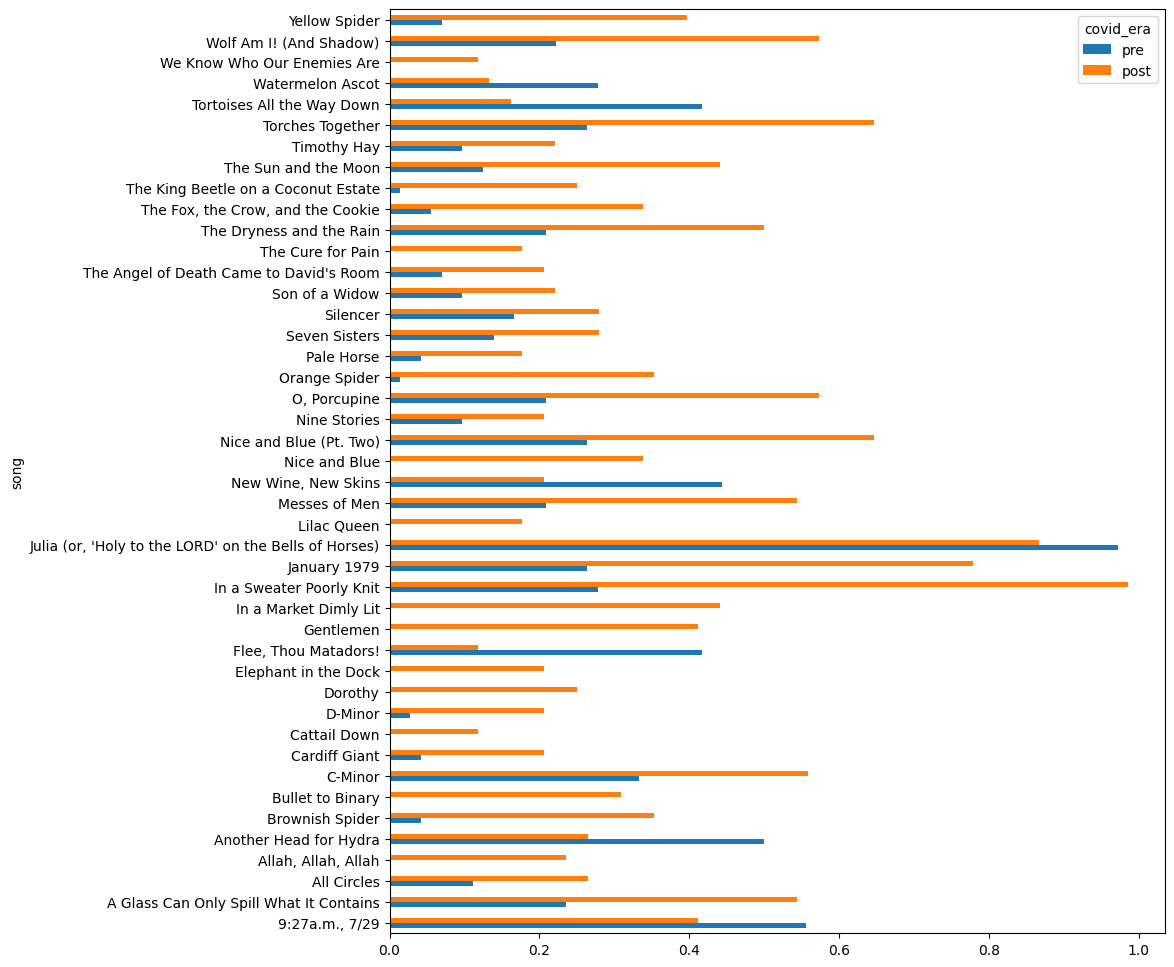

In [22]:
pivot.loc[pivot['change'].abs() > 0.1][['pre', 'post']].plot(kind='barh', figsize=(10, 12))

In [32]:
album_ref = pd.read_csv("reference/album_mapping.csv")
setlist = setlist.merge(album_ref, on="song", how="left")

In [44]:
# Get unmapped songs that are NOT covers
unmapped_songs = (
    setlist[(setlist['album'].isnull()) & (setlist['song_cover_flag'] == False)]
    ['song']
    .dropna()
    .unique()
)

print(f"Unmapped, non-cover songs: {len(unmapped_songs)}")
unmapped_songs

Unmapped, non-cover songs: 17


array(['Pale Horse', 'Wolf Am I! (And Shadow)',
       "Julia (or, 'Holy to the LORD' on the Bells of Horses)",
       'Break on Through (to the Other Side) [Pt. Two]', 'All Circles',
       'Gentlemen', 'Lilac Queen', 'A Stick, a Carrot & String',
       'Chapelcross Towns', 'Watermelon Ascot', 'Four Fires', 'Fairfield',
       '', '(A)', 'Four Word Letter',
       'The Comfort You Give Is Only Torment', 'Working in a Factory'],
      dtype=object)

In [43]:
album_ref[album_ref['album']=='[Untitled]']

,song,album
66,"9:27a.m., 7/29",[Untitled]
67,"Julia (or, ‘Holy to the LORD on the Bells of H...",[Untitled]
68,Another Head for Hydra,[Untitled]
69,[dormouse sighs],[Untitled]
70,Winter Solstice,[Untitled]
71,"Flee, Thou Matadors!",[Untitled]
72,Tortoises All the Way Down,[Untitled]
73,"2,459 Miles",[Untitled]
74,Wendy & Betsy,[Untitled]
75,"New Wine, New Skins",[Untitled]
